In [1]:
%display latex

# Maxwell Equations

Declare the space and the frame coordinates:

In [4]:
E.<x,y,z> = EuclideanSpace()
t = var('t')

E.frames()

[Coordinate frame (E^3, (e_x,e_y,e_z))]

Define an arbitrary Electric field:

In [5]:
efield = E.vector_field(
    function('E_x')(t, x, y, z),
    function('E_y')(t, x, y, z),
    function('E_z')(t, x, y, z),
    name=r"\vec{E}"
)

bfield = E.vector_field(
    function('B_x')(t, x, y, z),
    function('B_y')(t, x, y, z),
    function('B_z')(t, x, y, z),
    name=r"\vec{B}"
)

In [6]:
efield.display()

\vec{E} = E_x(t, x, y, z) e_x + E_y(t, x, y, z) e_y + E_z(t, x, y, z) e_z

In [7]:
bfield.display()

\vec{B} = B_x(t, x, y, z) e_x + B_y(t, x, y, z) e_y + B_z(t, x, y, z) e_z

## Visualising a potential
In classical electromagnetism, we can determine the electric field from a scalar potential
$$
\phi(\vec{x}) = -k \frac{q}{\sqrt{\left|x\right|^2}},
$$
through the relation
$$
\vec{E}(\vec{x}) = - \vec{\nabla}\phi(\vec{x}).
$$

In [9]:
epot = E.scalar_field(function(r"\phi")(x, y, z), name=r"\phi")
epot.display()

\phi: E^3 --> R
   (x, y, z) |--> \phi(x, y, z)

In [10]:
grad_epot = (-epot.gradient())
grad_epot.display()

-grad(\phi) = -d(phi)/dx e_x - d(phi)/dy e_y - d(phi)/dz e_z

In [11]:
epot.add_expr(1/sqrt(x^2 + y^2 + z^2))
grad_epot = (-epot.gradient())
grad_epot.display()

-grad(\phi) = x/(x^2 + y^2 + z^2)^(3/2) e_x + y/(x^2 + y^2 + z^2)^(3/2) e_y + z/(x^2 + y^2 + z^2)^(3/2) e_z

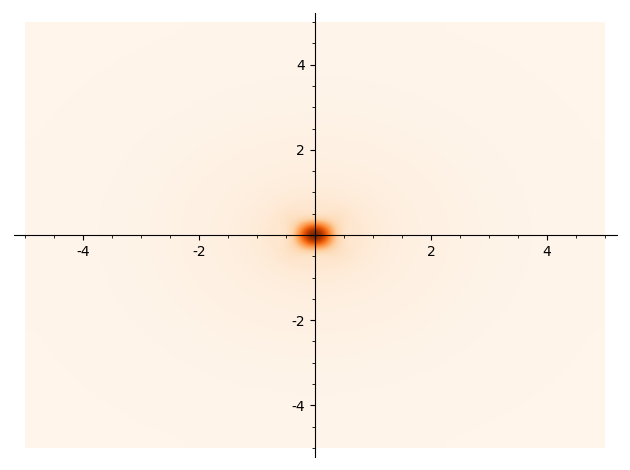

In [12]:
func = lambda x, y: epot.expr().subs(x=x, y=y, z=0.1)
dplot = density_plot(func(x, y), (x, -5, 5), (y, -5, 5), cmap="Oranges")
dplot

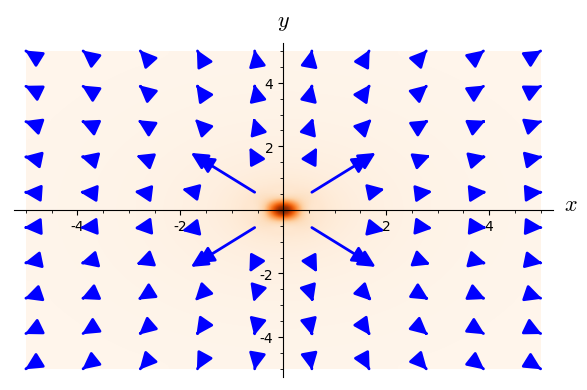

In [14]:
vplot = grad_epot.plot(
    fixed_coords={z:0.1}, 
    ambient_coords=(x, y), 
    ranges={x:(-5, 5), y:(-5, 5)},
    number_values=10
)
show(dplot + vplot)

## Calculating the speed of light
Prove needed vector identities, and then reduce to 1+1 dimensional case for $t$ and $x$.

### Vector Identities

Calculating a the vector identity:
$$
\nabla \times \left( \nabla \times \vec{V} \right) = \nabla \left( \nabla \cdot \vec{V} \right) - \nabla^2 \vec{V}
$$
where $\nabla^2 \vec{V}$ is sometimes also called the *Laplacian*, denoted $\Delta \vec{V}$.

In [15]:
lhs = efield.curl().curl()
lhs.display()

curl(curl(\vec{E})) = (-d^2(E_x)/dy^2 - d^2(E_x)/dz^2 + d^2(E_y)/dxdy + d^2(E_z)/dxdz) e_x + (d^2(E_x)/dxdy - d^2(E_y)/dx^2 - d^2(E_y)/dz^2 + d^2(E_z)/dydz) e_y + (d^2(E_x)/dxdz + d^2(E_y)/dydz - d^2(E_z)/dx^2 - d^2(E_z)/dy^2) e_z

In [16]:
rhs = efield.div().gradient() - efield.laplacian()
rhs.display()

grad(div(\vec{E}))-Delta(\vec{E}) = (-d^2(E_x)/dy^2 - d^2(E_x)/dz^2 + d^2(E_y)/dxdy + d^2(E_z)/dxdz) e_x + (d^2(E_x)/dxdy - d^2(E_y)/dx^2 - d^2(E_y)/dz^2 + d^2(E_z)/dydz) e_y + (d^2(E_x)/dxdz + d^2(E_y)/dydz - d^2(E_z)/dx^2 - d^2(E_z)/dy^2) e_z

In [17]:
(rhs - lhs).display()

grad(div(\vec{E}))-Delta(\vec{E})-curl(curl(\vec{E})) = 0

SageMath simplified for us, and reduced the expression to 0, proving the identity.

### Wave equation
From Maxwell-3, we take the curl of both sides
$$
\nabla \times \left( \nabla \times \vec{E} \right) = \nabla \times \left( - \frac{\partial \vec{B}}{\partial t} \right), \\
=  - \frac{\partial}{\partial t} \nabla \times \vec{B}, \\
= - \mu_0 \epsilon_0 \frac{\partial^2 \vec{E}}{\partial t^2}.
$$
Then, using the above identity, we can substitute the LHS, using Maxwell-1 to eliminate a term, to show the wave equation
$$
\nabla^2 \vec{E} = \mu_0 \epsilon_0 \frac{\partial^2 \vec{E}}{\partial t^2}.
$$

### 1+1 dimensions
Starting from the wave equation, rewritten in 1+1 dimensions:
$$
\frac{\partial^2 E}{\partial x^2} = \mu_0 \epsilon_0 \frac{\partial^2 E}{\partial t^2}.
$$

Expressing this in SageMath:

In [24]:
v, E, x, t = var('v', 'E', 'x', 't')
mu0 = var('mu0', latex_name=r"\mu_0")
eps0 = var('eps0', latex_name=r"\epsilon_0")
ef = function('E')(t, x)

wave_eq = diff(diff(ef, x), x) == mu0 * eps0 * diff(diff(ef, t), t)
display(wave_eq)

diff(E(t, x), x, x) == eps0*mu0*diff(E(t, x), t, t)

We can't directly solve this in SageMath, but we can guess a solution will be of the form
$$
\sin \left( x - v t \right),
$$
with *phase velocity* $v$. We can investigate a little more what this means by plotting the supposed solution:

In [36]:
ef = sin(x - v*t)
max_steps = 10
plot_frames = [
    plot(ef.subs(v=1, t=(2*pi*ti/max_steps)), (-pi, pi)) for ti in range(0, max_steps)
]
a = animate(plot_frames)
# a.show()
# cannot show without ImageMagick or FFMPEG on the Docker Image, which I can't really be
# bothered to do tonight

In [37]:
wave_eq = diff(diff(ef, x), x) == mu0 * eps0 * diff(diff(ef, t), t)
wave_eq = simplify(wave_eq)
display(wave_eq)


-sin(-t*v + x) == -eps0*mu0*v^2*sin(-t*v + x)

We see it is indeed a solution, provided:

In [46]:
condition = wave_eq.divide_both_sides(-ef)
display(condition)

1 == eps0*mu0*v^2

Solving this:

In [41]:
solution = wave_eq.solve(v)
display(solution)

[v == x/t, v == -sqrt(1/(eps0*mu0)), v == sqrt(1/(eps0*mu0))]

We have a positive and negative solution, reflecting the symmetry of the classical equations -- there is no *real* difference between the direction of time being forwards or backwards, thus a negative or positive velocity represent exactly the same wave behaviour. If we substitute in known values for the symbols:

In [45]:
solution[2].subs(mu0=1.25663706e-6, eps0=8.8541878128e-12)

v == 2.99792458252888e8